# 1. Data Scraping for graph

In [4]:
import requests
import json
#page = "Dudley_Dursley"
#page = "Fleur_Delacour"
#page = "Nagini"
#page = 'Boggart'
#page = 'Lucius_Malfoy'
#page = 'Salazar_Slytherin'
page = 'List_of_characters_in_translations_of_Harry_Potter'

url = f"https://harrypotter.fandom.com/api.php?action=parse&page={page}&format=json"
response = requests.get(url)
data = response.json()


print(data.keys())
print(data["parse"].keys())


dict_keys(['parse'])
dict_keys(['title', 'pageid', 'revid', 'text', 'langlinks', 'categories', 'links', 'templates', 'images', 'externallinks', 'sections', 'showtoc', 'parsewarnings', 'displaytitle', 'iwlinks', 'properties'])


In [5]:
#print(data["parse"]["pageid"]) # This is the page ID
#print(data["parse"]["text"]) # This contains the HTML content of the page
#print(data['parse']['langlinks']) # This contains links to other language versions of the page
#print(json.dumps(data['parse']['categories'], indent=2)) # This contains the categories the page belongs to
#print(data['parse']['properties']) # This contains various properties of the page

#print(data["parse"]["title"]) # This is the title of the page
#print(data['parse']['categories']) # This contains the categories the page belongs to, we have Wizards we can use to identify characters
print(data['parse']['links']) # This contains all the links on the page, we can use this to find other characters mentioned on the page


[{'ns': 0, 'exists': '', '*': 'Alastor Moody'}, {'ns': 0, 'exists': '', '*': 'Albus Dumbledore'}, {'ns': 0, 'exists': '', '*': 'Amelia Bones'}, {'ns': 0, 'exists': '', '*': 'Amos Diggory'}, {'ns': 0, 'exists': '', '*': 'Anthony Goldstein'}, {'ns': 0, 'exists': '', '*': 'Aragog'}, {'ns': 0, 'exists': '', '*': 'Archie Aymslowe'}, {'ns': 0, 'exists': '', '*': 'Argus Filch'}, {'ns': 0, 'exists': '', '*': 'Arnold Peasegood'}, {'ns': 0, 'exists': '', '*': 'Arthur Weasley'}, {'ns': 0, 'exists': '', '*': 'Avery (Riddle-era)'}, {'ns': 0, 'exists': '', '*': 'Bane'}, {'ns': 0, 'exists': '', '*': 'Bartemius Crouch Senior'}, {'ns': 0, 'exists': '', '*': 'Bellatrix Lestrange'}, {'ns': 0, 'exists': '', '*': 'Bertie Bott'}, {'ns': 0, 'exists': '', '*': 'Bloody Baron'}, {'ns': 0, 'exists': '', '*': 'Broderick Bode'}, {'ns': 0, 'exists': '', '*': 'Buckbeak'}, {'ns': 0, 'exists': '', '*': 'Cadogan'}, {'ns': 0, 'exists': '', '*': 'Cedric Diggory'}, {'ns': 0, 'exists': '', '*': 'Charles Weasley'}, {'ns': 0

In [6]:
# Extract all links from the page and add them to a list
links = data['parse']['links']
characters = []
for link in links:
    characters.append(link['*'])
print(characters)

['Alastor Moody', 'Albus Dumbledore', 'Amelia Bones', 'Amos Diggory', 'Anthony Goldstein', 'Aragog', 'Archie Aymslowe', 'Argus Filch', 'Arnold Peasegood', 'Arthur Weasley', 'Avery (Riddle-era)', 'Bane', 'Bartemius Crouch Senior', 'Bellatrix Lestrange', 'Bertie Bott', 'Bloody Baron', 'Broderick Bode', 'Buckbeak', 'Cadogan', 'Cedric Diggory', 'Charles Weasley', 'Cho Chang', 'Colin Creevey', 'Cornelius Agrippa', 'Cornelius Fudge', 'Crookshanks', 'Cuthbert Binns', 'Cuthbert Mockridge', 'Dean Thomas', 'Dedalus Diggle', 'Dennis Creevey', 'Dobby', 'Dolores Umbridge', 'Draco Malfoy', 'Dudley Dursley', "Dumbledore's Army", 'Eleanor Branstone', 'Emmeline Vance', 'Euan Abercrombie', 'Fang', 'Fat Friar', 'Fat Lady', 'Fawkes', 'Filius Flitwick', 'Firenze', 'Fleur Delacour', 'Fluffy', 'Fred Weasley', 'Gabrielle Delacour', 'Garrick Ollivander', 'George Weasley', 'Gilbert Wimple', 'Gilderoy Lockhart', 'Ginevra Weasley', 'Godric Gryffindor', 'Gregory Goyle', 'Griphook', 'Hannah Abbott', 'Harry Potter',

In [7]:
# Delete non-character links based on known non-character titles
delete_links = ['Harry Potter and the Half-Blood Prince (film)',
                 'Harry Potter in translation','Harry Potter universe',
                 'List of locations in translations of Harry Potter',
                 'Trio',
                 'Harry Potter and the Half-Blood Prince (film)',
                 "Dumbledore's Army",
                 'Order of the Phoenix',
                 'List of titles of Harry Potter books in other languages',
                 'List of wizarding terms in translations of Harry Potter']


In [8]:
# Remove the non character links from the characters list
for link in delete_links:
    if link in characters:
        characters.remove(link)

In [9]:
# defining a function that checks if a link is a character or not based on categories
def is_character(data, proper_categories = ['Wizards', 'Death_Eater_allies', 'Non-magic_people', 'Creatures_found_worldwide', 'Prophesied_individuals', 'Pure-blood_supremacists', 'Unforgivable_Curse_users', 'Pure-bloods', 'Wizard_of_the_Month']):
    print(data['parse']['title'])
    categories = data['parse']['categories']
    cat_names = [c["*"] for c in categories]
    print(cat_names)
    return any(cat in cat_names for cat in proper_categories)


In [10]:
def get_page(character):
    # replace spaces with underscores for URL formatting
    character = character.replace(" ", "_")
    url = f"https://harrypotter.fandom.com/api.php?action=parse&page={character}&format=json"
    response = requests.get(url)
    data = response.json()
    return data

In [11]:
# define a function that returns all links from a given page
def get_links_from_page(data):
    links = data['parse']['links']
    link_titles = []
    for link in links:
        link_titles.append(link['*'])
    return link_titles

In [12]:
import requests
from bs4 import BeautifulSoup

def get_infobox(character):
    url = f"https://harrypotter.fandom.com/wiki/{character.replace(' ', '_')}"
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "html.parser")

    infobox = soup.find("aside", {"class": "portable-infobox"})
    if infobox is None:
        return {}

    attrs = {}

    # Each item row in the infobox
    for item in infobox.find_all("div", class_="pi-item"):
        label = item.find("h3", class_="pi-data-label")
        value = item.find("div", class_="pi-data-value")

        if label and value:
            key = label.text.strip()
            val = value.text.strip()
            attrs[key] = val

    return attrs
#url = "https://harrypotter.fandom.com/wiki/Harry_Potter"
attributes = get_infobox("Harry Potter")
print(attributes.keys())  # Example: print the blood status attribute

dict_keys(['Born', 'Blood status', 'Marital status', 'Nationality', 'Also known as', 'Title(s)', 'Signature', 'Species', 'Gender', 'Height', 'Hair colour', 'Eye colour', 'Skin colour', 'Family members', 'Romances', 'Boggart', 'Wand', 'Patronus', 'Occupation', 'House', 'Loyalty'])


In [13]:
def get_attributes(infobox):
    attribute_keys = ['Gender', 'House', 'Blood status', 'Boggart', 'Species']
    attributes = {}
    for key in attribute_keys:
        if key in infobox:
            attributes[key] = infobox[key]
    return attributes

In [14]:
# defining a function to get only character links from a list
def get_character_links_from_page(page, character_list):
    all_links = get_links_from_page(page)
    character_links = [link for link in all_links if link in character_list]
    return character_links

In [15]:
# Generate network using nodes from the character list
import networkx as nx
G = nx.DiGraph()

In [16]:
for character in characters:
    # get the page data for the character
    page = get_page(character)
    # Extract infobox
    infobox = get_infobox(character)
    # Get relevant attributes
    attributes = get_attributes(infobox)
    G.add_node(character, **attributes)
    
    # get character links from the page
    character_links = get_character_links_from_page(page, characters)
    for link in character_links:
        G.add_edge(character, link)

In [17]:
# Display nodes and edges of network 142 nodes and 5676 edges in non filtered network
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 133
Number of edges: 5175


In [18]:
# Save the graph locally in GEXF format
nx.write_gexf(G, "harry_potter_characters_network.gexf")

In [19]:
# Load the graph bacl 
G = nx.read_gexf("harry_potter_characters_network.gexf")

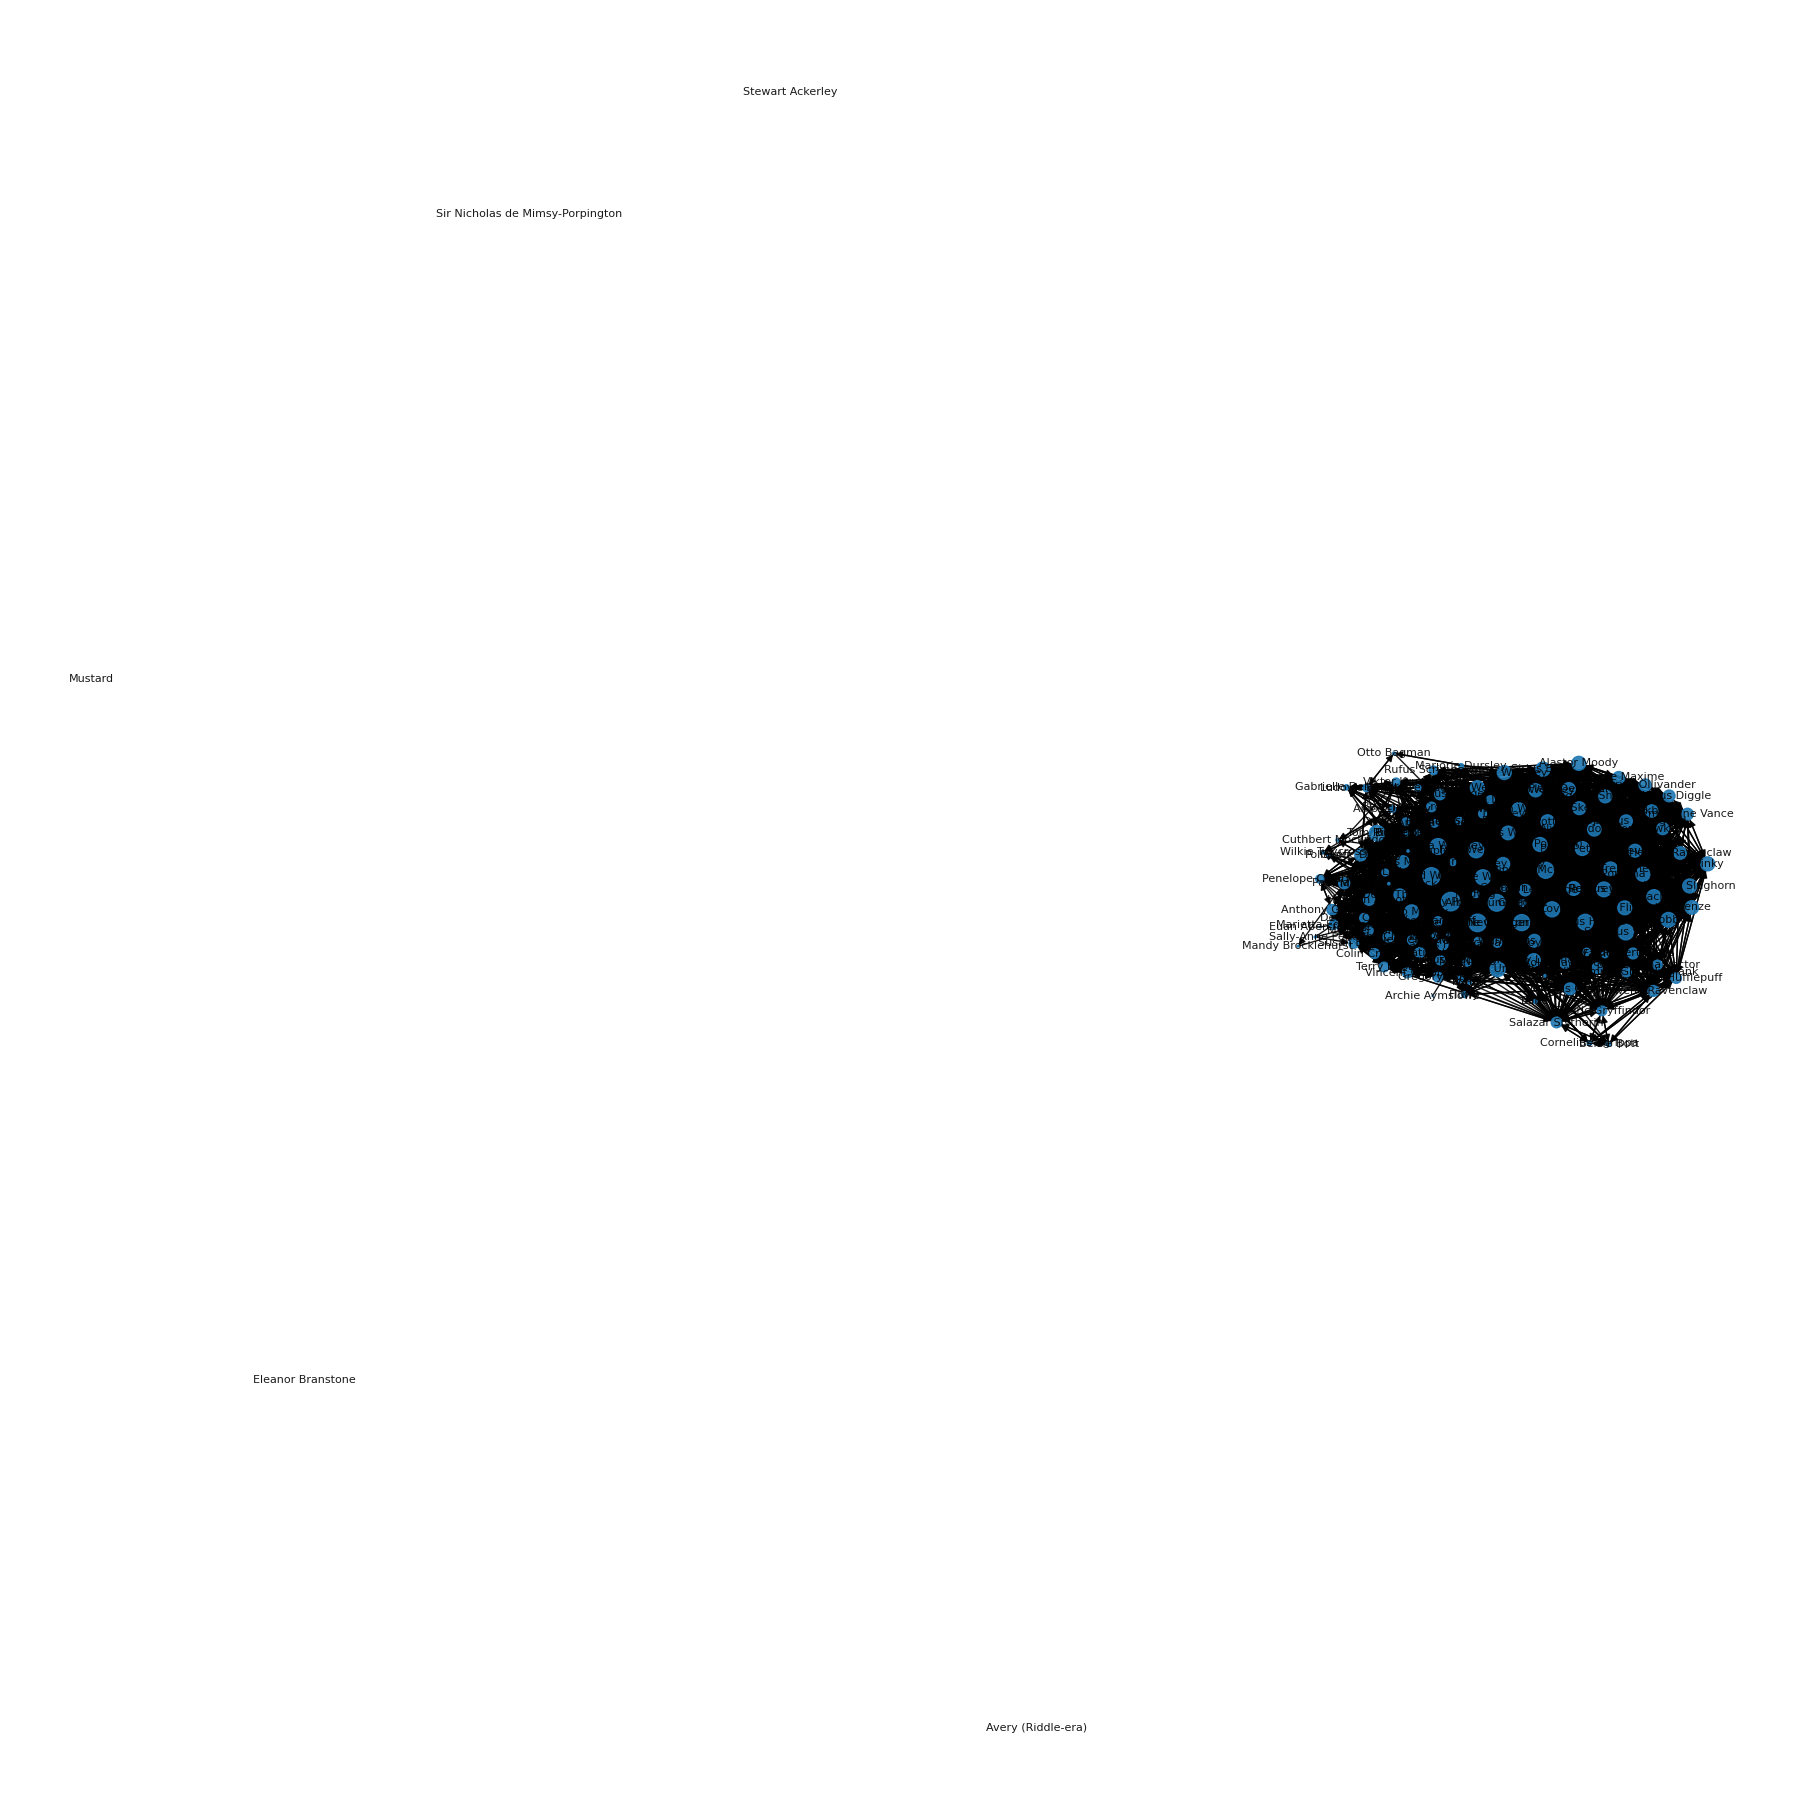

In [20]:
import matplotlib.pyplot as plt
# Play with the force atlas algorhitm to get a visualization you like
degree_b1 = nx.degree_centrality(G)
plt.figure(figsize=(18, 18))
pos = nx.forceatlas2_layout(
    G,
    scaling_ratio=0.5,
    gravity=5, # Applies center of gravity to 
    max_iter=1000
)

# Scale node sizes by eigen centrality (normalize for readability)
sizes_b1 = [v * 100 for v in degree_b1.values()]  # 5000 = scale factor, adjust as needed

# Draw graph
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_size=sizes_b1,
    alpha=0.9,
    font_size=8
)
plt.show()

# 2. Data Scraping for text

In [31]:
# Reading harry potter pdf and 
import PyPDF2
import nltk
from nltk.tokenize import word_tokenize

# Make sure you have nltk data
nltk.download('punkt')

# Additional NLTK downloads that might be needed (Oliver added this on 25.11.2025)
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')   # sometimes needed in new NLTK versions

[nltk_data] Downloading package punkt to /Users/oliverlow/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/oliverlow/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/oliverlow/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/oliverlow/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [34]:
pdf_path_book1 = "Harry_Potter_Books/HP1 - Harry Potter and the Sorcerer's Stone.pdf"
pdf_path_book2 = "Harry_Potter_Books/HP2 - Harry Potter and the Chamber of Secrets.pdf"
pdf_path_book3 = "Harry_Potter_Books/HP3 - Harry Potter and the Prisoner of Azkaban.pdf"
pdf_path_book4 = "Harry_Potter_Books/HP4 - Harry Potter and the Goblet of Fire.pdf"
pdf_path_book5 = "Harry_Potter_Books/HP5 - Harry Potter and the Order of the Phoenix.pdf"
pdf_path_book6 = "Harry_Potter_Books/HP6 - Harry Potter and the Half-Blood Prince.pdf"
pdf_path_book7 = "Harry_Potter_Books/HP7 - Harry Potter and the Deathly Hallows.pdf"
pdf_path_book8 = "Harry_Potter_Books/HP8 - Harry Potter and the Cursed Child.pdf"

In [36]:

pdf_path_book1 = "Harry_Potter_Books/HP1 - Harry Potter and the Sorcerer's Stone.pdf"
# note: Oliver changed the above path from "Harry_Potter_Books_alt/1 - harry-potter-and-the-philosophers-stone-by-jk-rowling.pdf" to "Harry_Potter_Books/HP1 - Harry Potter and the Sorcerer's Stone.pdf" (25.11.2025#pdf_path = r"C:\Users\lucas\Downloads\harry-potter-and-the-philosophers-stone-by-jk-rowling.pdf"
#pdf_path = "Harry_Potter_Books_alt/allharrypotter.pdf"
text = ""
with open(pdf_path_book1, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    #for page in reader.pages[7:]:
    for page in reader.pages[7:-3]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
#print(tokens[:100])
# print the last 100 tokens
print(tokens[-20:])
print(f"Total clean tokens: {len(tokens)}")

['printed', 'and', 'bound', 'at', 'RR', 'Donnelley', '&', 'Sons', ',', 'Willard', ',', 'Oh', '.', 'The', 'production', 'was', 'supervised', 'by', 'Angela', 'Biola']
Total clean tokens: 108174


In [37]:

pdf_path = pdf_path_book2


text = ""
with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages[5:]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
# Verifying the starting at chapter 1

print(f'The first tokens:{tokens[:20]}')

# Verfigying the ending of final chapter
print(f'The last tokens:{tokens[-20:]}')


print(f"Total clean tokens: {len(tokens)}")

The first tokens:['also', 'by', 'j.', 'k.', 'rowling', 'Harry', 'Potter', 'and', 'the', 'Sorcerer', '’', 's', 'Stone', 'Year', 'One', 'at', 'Hogwarts', 'Harry', 'Potter', 'and']
The last tokens:['World', '.', 'The', 'Managing', 'Editor', 'was', 'Manuela', 'Soares', '.', 'The', 'production', 'was', 'supervised', 'by', 'Angela', 'Biola', 'and', 'Mike', 'Derevjanik', '.']
Total clean tokens: 120128


In [38]:

pdf_path = pdf_path_book3
text = ""
with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages[5:]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
# Verifying the starting at chapter 1

print(f'The first tokens:{tokens[:20]}')

# Verfigying the ending of final chapter
print(f'The last tokens:{tokens[-20:]}')


print(f"Total clean tokens: {len(tokens)}")

The first tokens:['also', 'by', 'j.', 'k.', 'rowling', 'Harry', 'Potter', 'and', 'the', 'Sorcerer', '’', 's', 'Stone', 'Year', 'One', 'at', 'Hogwarts', 'Harry', 'Potter', 'and']
The last tokens:['Quebecor', 'Martinsburg', ',', 'in', 'Martinsburg', ',', 'West', 'Virginia', '.', 'The', 'production', 'was', 'supervised', 'by', 'Angela', 'Biola', 'and', 'Mike', 'Derevjanik', '.']
Total clean tokens: 153551


In [39]:

pdf_path = pdf_path_book4
text = ""
with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages[6:]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
# Verifying the starting at chapter 1

print(f'The first tokens:{tokens[:20]}')

# Verfigying the ending of final chapter
print(f'The last tokens:{tokens[-20:]}')


print(f"Total clean tokens: {len(tokens)}")

The first tokens:['Harry', 'Potter', 'and', 'the', 'goblet', 'of', 'fire', 'BY', 'J.', 'K.', 'Rowling', 'ILLUSTRATIONS', 'BY', 'Mary', 'GrandPré', 'ARTHUR', 'A.', 'LEVINE', 'BOOKS', 'AN']
The last tokens:['World', 'in', 'Fairfield', ',', 'Pennsylvania', '.', 'The', 'Managing', 'Editor', 'was', 'Manuela', 'Soares', 'and', 'the', 'Manufacturing', 'Director', 'was', 'Angela', 'Biola', '.']
Total clean tokens: 267828


In [40]:

pdf_path = pdf_path_book5
text = ""
with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages[16:-5]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
# Verifying the starting at chapter 1

print(f'The first tokens:{tokens[:20]}')

# Verfigying the ending of final chapter
print(f'The last tokens:{tokens[-20:]}')


print(f"Total clean tokens: {len(tokens)}")

The first tokens:['C', 'H', 'A', 'P', 'T', 'E', 'R', 'O', 'N', 'E', '\x91', '1', '\x91', 'DUDLEY', 'DEMENTED', 'he', 'hottest', 'day', 'of', 'the']
The last tokens:['the', 'sunlit', 'street', ',', 'with', 'Uncle', 'Vernon', ',', 'Aunt', 'Petunia', ',', 'and', 'Dudley', 'hurr', 'ying', 'along', 'in', 'his', 'wake', '.']
Total clean tokens: 356516


In [41]:

#pdf_path = "Harry_Potter_Books_alt/6 - harry-potter-and-the-half-blood-prince-j.k.-rowling.pdf"
pdf_path = pdf_path_book6
text = ""
with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages[13:-5]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
# Verifying the starting at chapter 1

print(f'The first tokens:{tokens[:20]}')

# Verifying the ending of final chapter
print(f'The last tokens:{tokens[-20:]}')


print(f"Total clean tokens: {len(tokens)}")

The first tokens:['C', 'H', 'A', 'P', 'T', 'E', 'R', 'O', 'N', 'E', '\x91', '1', '\x91', 'THE', 'OTHER', 'MINISTER', 't', 'was', 'nearing', 'midnight']
The last tokens:['the', 'thought', 'that', 'there', 'was', 'still', 'one', 'last', 'golden', 'day', 'of', 'peace', 'left', 'to', 'enjoy', 'with', 'Ron', 'and', 'Hermione', '.']
Total clean tokens: 236562


In [42]:

#pdf_path = "Harry_Potter_Books_alt/6 - harry-potter-and-the-half-blood-prince-j.k.-rowling.pdf"
pdf_path = pdf_path_book7
#pdf_path = "Harry_Potter_Books_alt/7 - harry-potter-and-the-deathly-hallows-j.k.-rowling.pdf"
text = ""
with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages[14:-5]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
# Verifying the starting at chapter 1

print(f'The first tokens:{tokens[:20]}')

# Verifying the ending of final chapter
print(f'The last tokens:{tokens[-20:]}')


print(f"Total clean tokens: {len(tokens)}")

The first tokens:['Harry', 'Potter', 'AND', 'THE', 'DEATHLY', 'HALLOWS', 'C', 'H', 'A', 'P', 'T', 'E', 'R', 'O', 'N', 'E', '\x91', '1', '\x91', 'THE']
The last tokens:['“', 'I', 'know', 'he', 'will.', '”', 'The', 'scar', 'had', 'not', 'pained', 'Harry', 'for', 'nineteen', 'years', '.', 'All', 'was', 'well', '.']
Total clean tokens: 271247


In [43]:

pdf_path = pdf_path_book8
text = ""
with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages[14:-5]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
# Verifying the starting at chapter 1

print(f'The first tokens:{tokens[:20]}')

# Verifying the ending of final chapter
print(f'The last tokens:{tokens[-20:]}')


print(f"Total clean tokens: {len(tokens)}")

The first tokens:['He', 'breathes', 'on', 'her', 'face', '.', 'LILY', 'giggles', '.', 'LILY', ':', 'You', 'smell', 'of', 'porridge', '.', 'RON', ':', 'Bing', '.']
The last tokens:['2012', 'won', 'Best', 'Drama', 'Series', '(', 'The', 'Fades', ')', 'and', 'Best', 'Mini-Series', '(', 'This', 'Is', 'England', '’', '88', ')', '.']
Total clean tokens: 62965


In [44]:
chap_dict = {}

index = 0
chap = 0
n = len(tokens)

def is_CHAPTER(i):
    # Detect C H A P T E R
    return tokens[i:i+7] == ['C','H','A','P','T','E','R'] 

def extract_chapter_number(i):
    # Read uppercase letters (e.g., O N E, T W O, T W E N T Y)
    letters = []
    j = i
    while j < n and len(tokens[j]) == 1 and tokens[j].isupper():
        letters.append(tokens[j])
        j += 1
    
    if letters:
        return "".join(letters), j
    
    # Or read digits like '1'
    if j < n and tokens[j].isdigit():
        return tokens[j], j+1

    return None, i

while index < n:
    if is_CHAPTER(index):
        chap += 1
        index += 7  # skip C H A P T E R letters
        
        # Extract chapter number
        number, next_index = extract_chapter_number(index)
        index = next_index
        
        chap_dict[chap] = []
        
        continue
    
    if chap != 0:
        chap_dict[chap].append(tokens[index])
    
    index += 1


In [4]:
print(chap_dict.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38])


In [5]:
# print len of each value in chap_dict
for key in chap_dict.keys():
    print(f"Chapter {key} has {len(chap_dict[key])} tokens.")

Chapter 1 has 7911 tokens.
Chapter 2 has 8534 tokens.
Chapter 3 has 7104 tokens.
Chapter 4 has 8075 tokens.
Chapter 5 has 7735 tokens.
Chapter 6 has 9294 tokens.
Chapter 7 has 6173 tokens.
Chapter 8 has 5721 tokens.
Chapter 9 has 11414 tokens.
Chapter 10 has 8058 tokens.
Chapter 11 has 7983 tokens.
Chapter 12 has 11558 tokens.
Chapter 13 has 12147 tokens.
Chapter 14 has 11202 tokens.
Chapter 15 has 9597 tokens.
Chapter 16 has 8322 tokens.
Chapter 17 has 9320 tokens.
Chapter 18 has 9704 tokens.
Chapter 19 has 9023 tokens.
Chapter 20 has 8951 tokens.
Chapter 21 has 10662 tokens.
Chapter 22 has 11130 tokens.
Chapter 23 has 10378 tokens.
Chapter 24 has 11110 tokens.
Chapter 25 has 10988 tokens.
Chapter 26 has 11633 tokens.
Chapter 27 has 10427 tokens.
Chapter 28 has 11102 tokens.
Chapter 29 has 10292 tokens.
Chapter 30 has 11640 tokens.
Chapter 31 has 10572 tokens.
Chapter 32 has 9065 tokens.
Chapter 33 has 5359 tokens.
Chapter 34 has 6966 tokens.
Chapter 35 has 10534 tokens.
Chapter 36 ha

In [46]:
# print all the times chapter appears in the tokens
for token in range(len(tokens)):
    if tokens[token:token+7] == ['C', 'H', 'A', 'P', 'T', 'E', 'R']:
        print(f"{tokens[token:token+13]} at index {token}")

In [47]:
# Separate tokens from each chapter into a dictionary
chap_dict = {}
current_chap = None
for token in range(len(tokens)):
    if tokens[token] == 'CHAPTER':
        chap_dict[tokens[token + 1]] = []  # Initialize list for chapter title
        current_chap = tokens[token + 1]
    elif current_chap is not None:
        chap_dict[current_chap].append(tokens[token])


In [48]:
import pickle

with open("hp5_tokens.pkl", "wb") as f:
    pickle.dump(chap_dict, f)


In [56]:
import sys

########## Oliver 25.11.2025 ############

clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]

#########################################

def get_size_mb(obj):
    size_bytes = sys.getsizeof(obj)
    if isinstance(obj, list):
        size_bytes += sum(sys.getsizeof(item) for item in obj)
    return size_bytes / (1024 * 1024)  # Convert bytes → MB

size_mb = get_size_mb(clean_tokens)        # Clean_tokens er muted ved bøgerne - Har lige lavet en ny liste fra markeret med ########
print(f"clean_tokens size: {size_mb:.2f} MB")


clean_tokens size: 2.44 MB


In [55]:
# Show context of Harry potter in tokens
harry_contexts = nltk.Text(tokens).concordance("Harry", width=80, lines=10)

Displaying 10 of 704 matches:
NE : They ’ re certainly something . HARRY : Parked all right , then ? RON : I 
i ! ALBUS : Dad . . . ALBUS pulls on HARRY ’ s robes . HARRY looks down . Do yo
. . ALBUS pulls on HARRY ’ s robes . HARRY looks down . Do you think — what if 
what if I ’ m put in Slytherin . . . HARRY : And what would be wrong with that 
t ’ s not a House of brave wizards . HARRY : Albus Severus , you were named aft
er knew . ALBUS : But just say . . . HARRY : If it matters to you , you , the S
ings into account . ALBUS : Really ? HARRY : It did for me . This is something 
US : I thought they were invisible ! HARRY : Listen to your professors , don ’ 
 then ALBUS turns and hugs GINNY and HARRY one last time before following after
board . HERMIONE , GINNY , RON , and HARRY stand watching the train — as whistl


In [57]:
# small edit to trigger git change